In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
# drop the uncessary column 
df = dataset.drop(['id','Unnamed: 32'],axis = 1)

In [4]:
# Numerize diagnosis "M" malignant; "B" benign using a dictionary and map function
df['diagnosis'] = df['diagnosis'].map({'M' : 0, 'B' : 1})

In [5]:
diagnosis = df.diagnosis

In [6]:
# drop the diagnosis
df = df.drop("diagnosis",axis=1)

In [7]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# add diagnosis in the end of the dataframe
df['Diagnosis'] = diagnosis

In [9]:

# Quick glimpse of tumor features (mean values) in relation to diagnosis
df.groupby('Diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [10]:
# visualisation des différents paramètres de la tumeur, on décompose en deux dataframes
df_m = df[df['Diagnosis'] == 0]
df_b = df[df['Diagnosis'] == 1]

# création de features pour les données de la tumeur
features_means =list(df.columns[0:10])

In [15]:
comptage_diagnosis = df.Diagnosis.value_counts()
comptage_diagnosis = pd.Series(comptage_diagnosis)
comptage_diagnosis = pd.DataFrame(comptage_diagnosis)
comptage_diagnosis.index = ['Begnin','Malignat']

,Diagnosis
Begnin,357
Malignat,212


In [20]:
comptage_diagnosis['Pourcentage'] = 100*comptage_diagnosis['Diagnosis']/sum(comptage_diagnosis["Diagnosis"])
comptage_diagnosis['Pourcentage'] = comptage_diagnosis['Pourcentage'].round().astype('int')
comptage_diagnosis.drop('pourcentage',axis=1)
comptage_diagnosis

,Diagnosis,pourcentage,Pourcentage
Begnin,357,62.741652,63
Malignat,212,37.258348,37


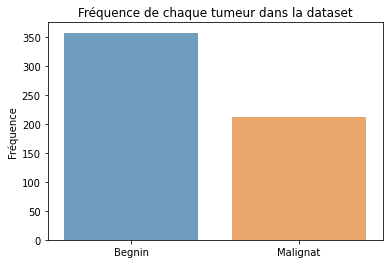

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = ['Begnin','Malignat'],y= 'Diagnosis', data=comptage_diagnosis, alpha = 0.7)
plt.title('Fréquence de chaque tumeur dans la dataset')
plt.ylabel('Fréquence')
plt.show()

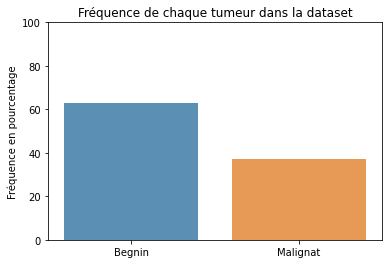

In [25]:
sns.barplot(x = ['Begnin','Malignat'],y= 'Pourcentage', data=comptage_diagnosis, alpha = 0.8)
plt.title('Fréquence de chaque tumeur dans la dataset')
plt.ylabel('Fréquence en pourcentage')
plt.ylim(0,100)
plt.show()

In [26]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Diagnosis'],
      dtype='object')

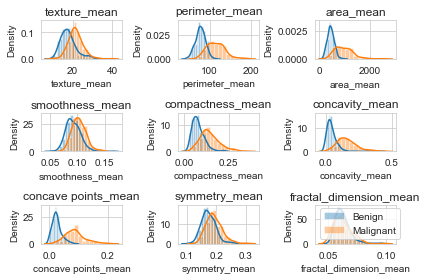

In [32]:
# initialiser une figure pour voir les caractéristiques de la tumeur
fig = plt.figure()

# on parcourt les features de la tumeur 
for i,j in enumerate(list(df.columns[1:10])):
    i += 1 
    ax = fig.add_subplot(3,3,i)
    sns.distplot(df_b[j],kde=True, label = 'Benign')
    sns.distplot(df_m[j],kde=True, label = 'Malignant')
    ax.set_title(j)
sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

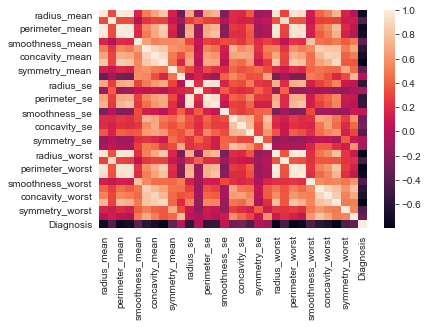

In [35]:
sns.heatmap(df.corr())
sns.set_style("whitegrid")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.Diagnosis, test_size=0.15, random_state=31)

In [38]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler and apply it to the data

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [39]:
print(y_train.shape)

(483,)


In [40]:
from sklearn.linear_model import LogisticRegression
LogReg_clf = LogisticRegression(random_state = 0)

LogReg_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
y_pred = LogReg_clf.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score


acc =  accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


print(acc)

print(cm)

0.9651162790697675
[[31  2]
 [ 1 52]]
